# **Import packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt 

# **Load data**

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Split data to test & train**

In [4]:
data = np.array(data)
m, n = data.shape # 42001*785
np.random.shuffle(data)

data_test = data[0:1000].T  
# we take only 1000 examples and we are sure that every number is there 
Y_test = data_test[0]  # the results array (1 2 3 4 6 9 8 ...)
X_test = data_test[1:n]  # matrix of the pixels witout the label row
X_test = X_test / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255


# **Check dimensions**

In [5]:
import numpy as np
import pandas as pd
from tabulate import tabulate  # Import the tabulate function

# Define the matrices and their dimensions
matrices = {
    'Matrix': ['Y_test', 'X_test', 'Y_train', 'X_train'],
    'Dimensions': [Y_test.shape, X_test.shape, Y_train.shape, X_train.shape]
}

# Create a DataFrame from the matrices dictionary
df = pd.DataFrame(matrices)

# Convert the DataFrame to a list of lists for tabulate
table = df.values.tolist()

# Define the headers for the table
headers = df.columns

print("\nGrid Table:")
print(tabulate(table, headers=headers, tablefmt='grid'))




Grid Table:
+----------+--------------+
| Matrix   | Dimensions   |
+==========+==============+
| Y_test   | (1000,)      |
+----------+--------------+
| X_test   | (784, 1000)  |
+----------+--------------+
| Y_train  | (41000,)     |
+----------+--------------+
| X_train  | (784, 41000) |
+----------+--------------+


# **Initialisation of parameters**

In [6]:
'''
def init_params():
    W1 = np.random.rand(10,784) 
    b1 = np.random.rand(10,1) 
    W2 = np.random.rand(10,10) 
    b2 = np.random.rand(10,1) 
    return W1, b1, W2, b2 

def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2 

# Xavier initialization

def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(1. / 784)  # Xavier initialization for W1
    b1 = np.zeros((10, 1))  # Biases initialized to zero
    W2 = np.random.randn(10, 10) * np.sqrt(1. / 10)  # Xavier initialization for W2
    b2 = np.zeros((10, 1))  # Biases initialized to zero
    return W1, b1, W2, b2
'''

# first I didn't put the -0.5 so the random data was between 0 and 1 which is not the optimal
# initialisation it have a slow learning rate so we centerd the weights and the bias around 0 [-0.5 , 0.5]

'\ndef init_params():\n    W1 = np.random.rand(10,784) \n    b1 = np.random.rand(10,1) \n    W2 = np.random.rand(10,10) \n    b2 = np.random.rand(10,1) \n    return W1, b1, W2, b2 \n\ndef init_params():\n    W1 = np.random.rand(10,784) - 0.5\n    b1 = np.random.rand(10,1) - 0.5\n    W2 = np.random.rand(10,10) - 0.5\n    b2 = np.random.rand(10,1) - 0.5\n    return W1, b1, W2, b2 \n\n# Xavier initialization\n\ndef init_params():\n    W1 = np.random.randn(10, 784) * np.sqrt(1. / 784)  # Xavier initialization for W1\n    b1 = np.zeros((10, 1))  # Biases initialized to zero\n    W2 = np.random.randn(10, 10) * np.sqrt(1. / 10)  # Xavier initialization for W2\n    b2 = np.zeros((10, 1))  # Biases initialized to zero\n    return W1, b1, W2, b2\n'

# **Optimal Initialisation method**

In [7]:
# He initialization (optimal)

def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(2. / 784)  # He initialization for W1
    b1 = np.zeros((10, 1))  # Biases initialized to zero
    W2 = np.random.randn(10, 10) * np.sqrt(2. / 10)  # He initialization for W2
    b2 = np.zeros((10, 1))  # Biases initialized to zero
    return W1, b1, W2, b2


# **Foawrd Propagation**

In [8]:
def ReLu(Z):
    return np.maximum(0,Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0))
    return expZ / expZ.sum(axis=0, keepdims=True)
# to change the data to a Probability Distribution 

    
def FP(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# **Backward Propagation**

In [9]:
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    # this creat a matrix of zeros [42000 ,10]
    one_hot_y[np.arange(y.size), y] = 1
    # this is smart indexing np.arange(y.size) creat an array [42000,1] with integers from 0 to 41999 just for indexing the row
    # y is the array of labels [1, 42000] inside thers are just numbers from 0 to 9 so in each row we put 1 in the right place 
    # we transpose to get [10, 42000] because the result is at 10 neurons
    return one_hot_y.T 

def deriv_ReLu(Z):
    return Z > 0 
# this function is the derivate of the ReLu function which is either 0 if negative or 1 if positive and true = 1 false = 0 

def BP(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_y = one_hot(Y)
    dZ2 = A2 - one_hot_y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, dW2, db1, db2

# **Update Paramerts**

In [10]:
def Update_pram(W1, W2, b1, b2, dW1, dW2, db1, db2, ALPHA):
    W1 = W1 - ALPHA * dW1
    b1 = b1 - ALPHA * db1
    W2 = W2 - ALPHA * dW2
    b2 = b2 - ALPHA * db2
    return W1, b1, W2, b2



# **Gradient Descent**

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0)

#Implicit Mapping:

#The way neural networks implicitly map the output layer's neurons to class labels can be unclear. 
#Newcomers might not realize that there's an assumed order (index 0 is class 0, index 1 is class 1, etc.).

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, ALPHA):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = FP(W1, b1, W2, b2, X)
        dW1, dW2, db1, db2 = BP(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = Update_pram(W1, W2, b1, b2, dW1, dW2, db1, db2, ALPHA)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2
    

# **Training**

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[6 0 1 ... 1 1 1] [6 5 8 ... 8 3 8]
Accuracy:  0.09741463414634147
Iteration:  10
[6 0 1 ... 1 5 8] [6 5 8 ... 8 3 8]
Accuracy:  0.34824390243902437
Iteration:  20
[6 0 1 ... 6 5 8] [6 5 8 ... 8 3 8]
Accuracy:  0.52
Iteration:  30
[6 0 8 ... 6 3 8] [6 5 8 ... 8 3 8]
Accuracy:  0.7069512195121951
Iteration:  40
[6 5 8 ... 2 3 8] [6 5 8 ... 8 3 8]
Accuracy:  0.7660731707317073
Iteration:  50
[6 5 8 ... 2 3 8] [6 5 8 ... 8 3 8]
Accuracy:  0.7931219512195122
Iteration:  60
[6 5 8 ... 2 3 8] [6 5 8 ... 8 3 8]
Accuracy:  0.8115609756097562
Iteration:  70
[6 5 8 ... 2 3 8] [6 5 8 ... 8 3 8]
Accuracy:  0.8260975609756097
Iteration:  80
[6 5 8 ... 2 3 8] [6 5 8 ... 8 3 8]
Accuracy:  0.8380243902439024
Iteration:  90
[6 5 8 ... 2 3 8] [6 5 8 ... 8 3 8]
Accuracy:  0.8455121951219512
Iteration:  100
[6 5 8 ... 2 3 8] [6 5 8 ... 8 3 8]
Accuracy:  0.853390243902439
Iteration:  110
[6 5 8 ... 8 3 8] [6 5 8 ... 8 3 8]
Accuracy:  0.859
Iteration:  120
[6 5 8 ... 8 3 8] [6 5 8 ... 8 3 8]
A

# **Compare Initialisation methodes**

In [13]:
from tabulate import tabulate

# Define data for the table
data = [
    ['Uniform [0, 1]', '12.24%', 'Random weights and biases in a narrow range'],
    ['Uniform [-0.5, 0.5]', '84.7%', 'Random weights and biases in a wider range'],
    ['Xavier Initialization', '90.13%', 'Adjusts weights to maintain variance through layers'],
    ['He Initialization', '90.78%', 'Optimized for ReLU activations, adjusts weights for better performance']
]

# Define column headers
headers = ['Method', 'Accuracy', 'Description']

# Create and print the table
print(tabulate(data, headers=headers, tablefmt='grid'))


+-----------------------+------------+------------------------------------------------------------------------+
| Method                | Accuracy   | Description                                                            |
+=======================+============+========================================================================+
| Uniform [0, 1]        | 12.24%     | Random weights and biases in a narrow range                            |
+-----------------------+------------+------------------------------------------------------------------------+
| Uniform [-0.5, 0.5]   | 84.7%      | Random weights and biases in a wider range                             |
+-----------------------+------------+------------------------------------------------------------------------+
| Xavier Initialization | 90.13%     | Adjusts weights to maintain variance through layers                    |
+-----------------------+------------+------------------------------------------------------------------

# **Make predictions on the Training data**

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _,_,_,A2 = FP(W1, b1, W2, b2, X)  # Perform forward propagation
    predictions = get_predictions(A2)  # Get the predicted class
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]  # Select the image at the given index and add a new axis  
    
    # the None is used to shape the Image to match the expected 2D array for the function FP we need (784,1) not (784,) which
    # is not the same shape as (728,41000) so it is necessary to work 
    
    prediction = make_predictions(current_image, W1, b1, W2, b2)  # Make predictions for the selected image
    label = Y_train[index]  # Get the true label of the image
    print("Prediction: ", prediction)  # Print the predicted label
    print("Label: ", label)  # Print the true label
    current_image = current_image.reshape((28, 28)) * 255  # Reshape and scale the image for display
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')  # Display the image
    plt.show()


# **Test**

Prediction:  [7]
Label:  7


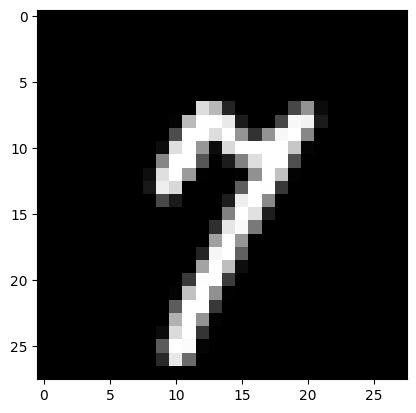

In [15]:
test_prediction(12347,W1, b1, W2, b2)

# **Make predictions on the test data**

In [16]:
Test_predictions = make_predictions(X_test, W1, b1, W2, b2)
print('the Test_data accuracy is',get_accuracy(Test_predictions, Y_test))

[9 8 0 4 6 0 0 3 4 9 2 7 3 5 7 0 6 5 2 9 1 6 8 2 1 2 9 9 6 4 3 7 0 1 7 5 0
 1 4 3 1 4 4 2 4 1 6 2 3 1 9 9 6 5 7 8 5 8 4 1 1 6 8 5 7 4 1 1 5 6 5 2 5 7
 1 9 6 3 1 6 1 5 0 6 7 1 9 4 1 1 1 6 7 9 3 2 5 3 6 7 0 1 0 1 1 1 9 7 5 0 9
 1 4 4 5 7 3 1 8 2 1 3 6 4 9 6 8 1 3 1 9 8 6 9 5 1 5 7 4 6 8 2 2 0 6 8 8 0
 7 7 3 6 8 9 3 7 7 2 5 9 7 7 1 3 3 8 5 6 9 3 8 0 8 2 4 4 3 2 3 4 0 9 5 1 6
 2 7 6 4 7 7 1 7 3 7 8 2 8 7 4 0 8 8 2 6 7 3 8 0 3 0 8 0 1 3 7 0 3 5 6 6 3
 1 8 5 5 2 9 2 5 1 3 6 0 9 1 7 0 6 1 1 4 4 4 0 5 3 4 9 8 4 4 7 6 7 6 0 7 6
 6 2 9 6 4 6 4 6 6 4 0 4 7 7 8 7 6 1 3 6 8 1 0 8 3 6 5 8 1 0 1 1 8 8 5 8 1
 3 0 1 7 7 2 1 9 4 2 2 1 3 3 0 9 5 0 6 8 9 2 8 7 5 7 8 2 3 9 5 7 7 6 2 6 2
 9 2 1 4 3 9 7 3 3 1 8 0 1 6 2 9 7 6 1 4 8 1 7 3 4 1 0 4 3 1 2 2 1 9 8 6 1
 5 7 1 3 7 9 9 2 0 8 2 7 2 3 7 1 0 8 0 0 7 9 0 9 1 6 4 8 3 7 0 7 9 6 6 1 3
 6 4 5 0 8 5 5 3 8 9 3 5 0 5 6 0 9 6 1 9 5 9 6 8 0 0 1 2 9 1 3 2 0 3 6 2 0
 1 1 8 9 3 0 1 6 5 9 5 1 7 4 7 1 0 1 6 5 9 7 5 2 6 6 1 0 4 3 0 7 7 6 1 5 9
 6 9 8 2 8 3 3 4 2 6 1 9 

25 images that the AI get wrong:



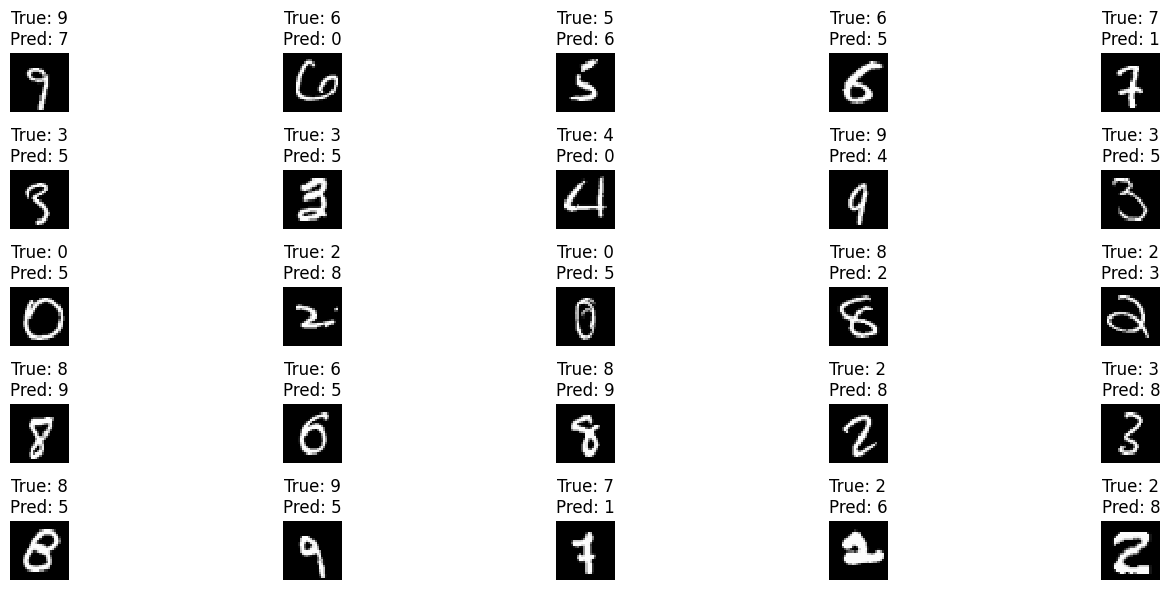

In [17]:
# Identify mistakes
mistakes = np.where(Test_predictions!= Y_test)[0]
    
# Get up to 10 indices of mistakes
mistake_indices = mistakes[:25]

print('25 images that the AI get wrong:\n')

# Plot the images of the mistakes
fig, axes = plt.subplots(5, 5, figsize=(15, 6))  # Create a 5x5 grid for plotting
axes = axes.flatten()  # Flatten the grid for easy iteration
    
for i, index in enumerate(mistake_indices):
    current_image = X_test[:, index, None].reshape((28, 28)) * 255  # Reshape and scale the image
    true_label = Y_test[index]  # Get the true label
    predicted_label = Test_predictions[index]  # Get the predicted label
        
    # Plot the image
    axes[i].imshow(current_image, interpolation='nearest', cmap='gray')
    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}")
    axes[i].axis('off')  # Turn off the axis
    
plt.tight_layout()
plt.show()